In [1]:
import numpy as np
import aipy
from hera_cal import omni
import hera_qm.ant_metrics as ant_metrics
import sys
from copy import deepcopy
from pyuvdata import UVData
import json
import os
from hera_cal.utils import get_aa_from_uv
from hera_cal.omni import aa_to_info


could not import sklearn


In [2]:
pols = ['xx','xy','yx','yy']
antpols = ['x','y']
origin = '/lustre/aoc/projects/hera/plaplant/'
time = '2458038.23429'
day = time.split('.')[0]
fullpol_file_list = [[origin + day + '/zen.' + time + '.' + pol + '.HH.uv' for pol in pols]]
metricsJSONFilename = time+'.metrics.json'

In [3]:
first_file = fullpol_file_list[0][0]
uvd = UVData()
uvd.read_miriad(first_file)
aa = get_aa_from_uv(uvd)
del uvd

In [4]:
info = aa_to_info(aa, pols=[pols[-1][0]])
reds = info.get_reds()

In [5]:
jd_list = fullpol_file_list[0]
am = ant_metrics.Antenna_Metrics(jd_list, reds, fileformat='miriad')
am.iterative_antenna_metrics_and_flagging(crossCut=5, deadCut=5, verbose=True)

Combined polarizations are not evenly spaced. This will make it impossible to write this data out to some file types.


On iteration 0 we flag (51, 'y')
On iteration 0 we flag (51, 'x')
On iteration 1 we flag (143, 'x')
On iteration 2 we flag (121, 'x')
On iteration 3 we flag (50, 'x')
On iteration 4 we flag (121, 'y')
On iteration 5 we flag (143, 'y')


In [6]:
am.save_antenna_metrics(metricsJSONFilename)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_metric(metrics, ants=None, antpols=None, title='', ylabel='Modified z-Score', xlabel=''):
    '''Helper function for quickly plotting an individual antenna metric.'''

    if ants is None:
        ants = list(set([key[0] for key in metrics.keys()]))
    if antpols is None:
        antpols = list(set([key[1] for key in metrics.keys()]))

    for antpol in antpols:
        for i,ant in enumerate(ants):
            metric = 0
            if metrics.has_key((ant,antpol)):
                metric = metrics[(ant,antpol)]
            plt.plot(i,metric,'.')
            plt.annotate(str(ant)+antpol,xy=(i,metrics[(ant,antpol)]))
        plt.gca().set_prop_cycle(None)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

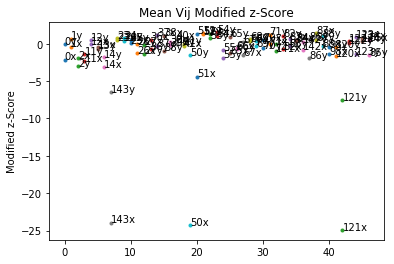

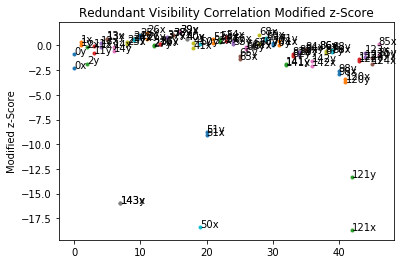

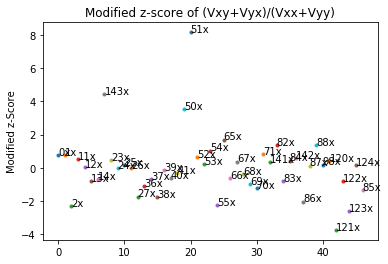

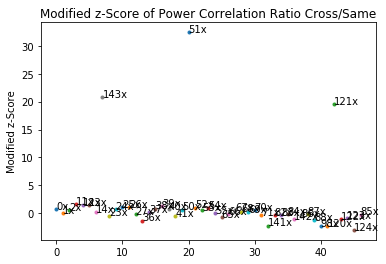

In [8]:
metrics_results = ant_metrics.load_antenna_metrics(metricsJSONFilename)

plt.figure()
plot_metric(metrics_results['final_mod_z_scores']['meanVij'], 
            title = 'Mean Vij Modified z-Score')

plt.figure()
plot_metric(metrics_results['final_mod_z_scores']['redCorr'],
            title = 'Redundant Visibility Correlation Modified z-Score')

plt.figure()
plot_metric(metrics_results['final_mod_z_scores']['meanVijXPol'], antpols=['x'],
            title = 'Modified z-score of (Vxy+Vyx)/(Vxx+Vyy)')

plt.figure()
plot_metric(metrics_results['final_mod_z_scores']['redCorrXPol'], antpols=['x'],
            title = 'Modified z-Score of Power Correlation Ratio Cross/Same')